In [1]:
# 📓 Feature Engineering Notebook for DevOps Learners

# ---
# 🧪 Imports
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

# ---
# 📥 Load Cleaned Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Pricing/cleaned_house_data.csv")
df.head()


Mounted at /content/drive/


,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.5,Suburb,1956,Good
1,752000,2526,3,2.5,Downtown,1998,Excellent
2,319000,1622,2,1.5,Rural,1975,Fair
3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,462000,1835,2,2.0,Urban,1982,Good


In [2]:
# ---
# 🔍 3. Initial Data Exploration

# Print dataset shape: rows × columns
print("Dataset shape (colums, rows):", df.shape)

# Print summary of column names, types, null counts, etc.
df.info()

# Show basic stats (mean, min, max, std) for numeric columns
df.describe()

# ---
# 🧠 Why this matters:
# This gives a quick overview of the data:
#  Are there missing values?
#  What kind of columns are there (numeric, text)?
#  Do the values look reasonable?n


Dataset shape (colums, rows): (77, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       77 non-null     int64  
 1   sqft        77 non-null     int64  
 2   bedrooms    77 non-null     int64  
 3   bathrooms   77 non-null     float64
 4   location    77 non-null     object 
 5   year_built  77 non-null     int64  
 6   condition   77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.3+ KB


,price,sqft,bedrooms,bathrooms,year_built
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000
mean,5.532338e+05,2068.000000,2.701299,2.025974,1979.025974
std,2.651523e+05,522.756711,0.689488,0.643265,17.427273
min,2.490000e+05,1350.000000,2.000000,1.000000,1947.000000
25%,3.680000e+05,1680.000000,2.000000,1.500000,1965.000000
50%,4.950000e+05,1950.000000,3.000000,2.000000,1981.000000
75%,6.200000e+05,2280.000000,3.000000,2.500000,1992.000000
max,1.250000e+06,3250.000000,4.000000,3.500000,2010.000000


In [3]:
# ---
# 🎯 Feature Engineering (Human-Readable)

# Feature 1: Age of the house
df['house_age'] = datetime.now().year - df['year_built']

# Feature 2: Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft']

# Feature 3: Ratio of bedrooms to bathrooms
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

# Handle division by zero and infinite values
df['bed_bath_ratio'] = df['bed_bath_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 📊 Quick Look at Engineered Data
df[['house_age', 'price_per_sqft', 'bed_bath_ratio']].describe()


,house_age,price_per_sqft,bed_bath_ratio
count,77.000000,77.000000,77.000000
mean,45.974026,255.220441,1.382437
std,17.427273,54.499780,0.263195
min,15.000000,179.761905,1.000000
25%,33.000000,226.829268,1.200000
50%,44.000000,251.904762,1.333333
75%,60.000000,275.193798,1.500000
max,78.000000,390.070922,2.000000


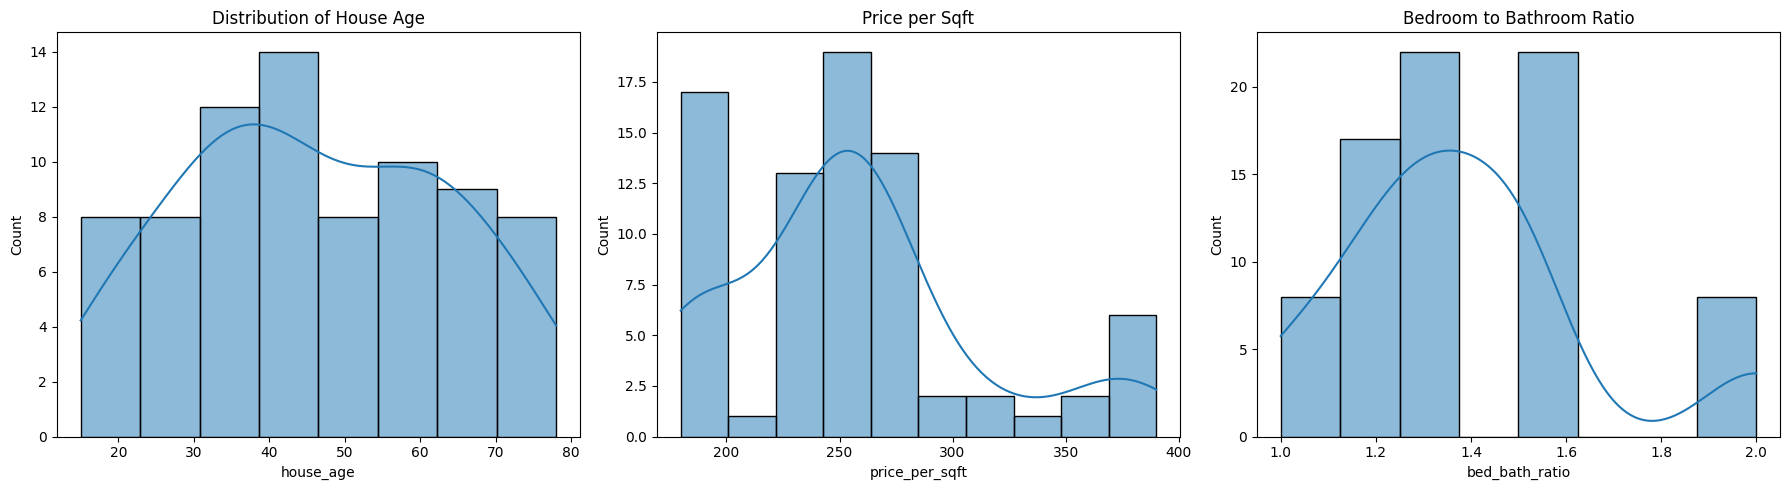

In [4]:
# 📊 5. Visualize the New Features

# Plot distributions of the new features to check if they make sense

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['house_age'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of House Age')

sns.histplot(df['price_per_sqft'], kde=True, ax=axs[1])
axs[1].set_title('Price per Sqft')

sns.histplot(df['bed_bath_ratio'], kde=True, ax=axs[2])
axs[2].set_title('Bedroom to Bathroom Ratio')

plt.tight_layout()
plt.show()


In [5]:
# 💾 Save Final Engineered Features (Human-Readable CSV)

selected_columns = [
    'price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition',
    'house_age', 'price_per_sqft', 'bed_bath_ratio'
]

df[selected_columns].to_csv("/content/drive/MyDrive/Colab Notebooks/House Pricing/data_scientists_features.csv", index=False)
print("✅ Saved human-readable engineered features to /content/drive/MyDrive/Colab Notebooks/House Pricing/data_scientists_features.csv")


✅ Saved human-readable engineered features to /content/drive/MyDrive/Colab Notebooks/House Pricing/data_scientists_features.csv


In [ ]:
# ✅ 8. Summary
# We:
# - Created domain-informed features: house_age, price_per_sqft, bed_bath_ratio
# - Explored and visualized them
# - Built a preprocessing pipeline using sklearn
# - Saved the preprocessed data and pipeline for downstream ML tasks

# 👨‍🔬 This notebook represents the **data scientist/MLE workflow** for feature engineering,
# before these steps are automated via a script like `engineer.py` for production.

# 📦 Next step: Experimentation to find out the right Algorithm and its Configurations (Hyperparameters)!
